# Given a historical trading data file, plot a candlestick chart 

In [18]:
!pip install mpl_finance

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [55]:
CFG_DATA_FILE       = './data/forex/EURUSD.csv'
CFG_DATA_COLUMNS    = ["TIMESTAMP", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME"]
CFG_DATA_FINAL_COLS = ["DATE", "OPEN", "HIGH", "LOW", "CLOSE"]

In [56]:
df = pd.read_csv(CFG_DATA_FILE, engine='python', sep=' |;', names=CFG_DATA_COLUMNS).head(1000)
df.head(4)

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME
20190201,0,1.14420,1.14428,1.14418,1.14418,0
20190201,100,1.14418,1.14425,1.14414,1.14414,0
20190201,200,1.14414,1.14415,1.14409,1.14410,0
20190201,300,1.14410,1.14411,1.14409,1.14411,0


In [57]:
# Converting date to pandas datetime format
df['DATE'] = pd.to_datetime(df.TIMESTAMP)
df["DATE"] = df["DATE"].apply(mdates.date2num)
df.head(4)

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,DATE
20190201,0,1.14420,1.14428,1.14418,1.14418,0,719163.0
20190201,100,1.14418,1.14425,1.14414,1.14414,0,719163.0
20190201,200,1.14414,1.14415,1.14409,1.14410,0,719163.0
20190201,300,1.14410,1.14411,1.14409,1.14411,0,719163.0


In [58]:
df.drop(['TIMESTAMP', 'VOLUME'], axis=1, inplace=True)
df.head(4)

,OPEN,HIGH,LOW,CLOSE,DATE
20190201,1.14420,1.14428,1.14418,1.14418,719163.0
20190201,1.14418,1.14425,1.14414,1.14414,719163.0
20190201,1.14414,1.14415,1.14409,1.14410,719163.0
20190201,1.14410,1.14411,1.14409,1.14411,719163.0


In [59]:
# ensuring only equity series is considered
#df = df.loc[df['Series'] == 'EQ']


# Creating required data in new DataFrame OHLC
ohlc= df[CFG_DATA_FINAL_COLS].copy()
ohlc.head()

,DATE,OPEN,HIGH,LOW,CLOSE
20190201,719163.0,1.14420,1.14428,1.14418,1.14418
20190201,719163.0,1.14418,1.14425,1.14414,1.14414
20190201,719163.0,1.14414,1.14415,1.14409,1.14410
20190201,719163.0,1.14410,1.14411,1.14409,1.14411
20190201,719163.0,1.14411,1.14414,1.14409,1.14410


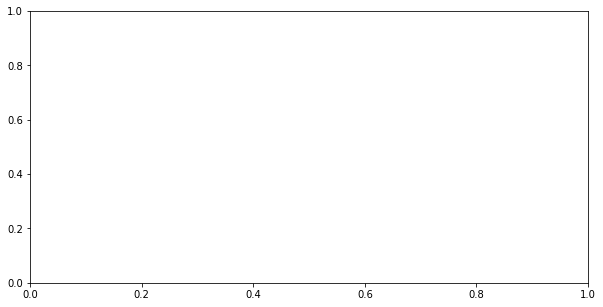

In [60]:
# In case you want to check for shorter timespan
# ohlc =ohlc.tail(60)

f1, ax = plt.subplots(figsize = (10,5))

In [61]:
ax.aname

'Axes'

In [62]:
# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

In [64]:
# Saving the image
plt.savefig('EURUSD.png')

<Figure size 432x288 with 0 Axes>

In [53]:
# Plot the image
plt.show()
